In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
# load predicted values from the previous 6-fold cross-validation as df
fps_xgboost_1 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_esol_total_fold_1.csv')
fps_xgboost_2 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_esol_total_fold_2.csv')
fps_xgboost_3 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_esol_total_fold_3.csv')
fps_xgboost_4 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_esol_total_fold_4.csv')
fps_xgboost_5 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_esol_total_fold_5.csv')
fps_xgboost_6 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_esol_total_fold_6.csv')
# concat the data, rename columns (actual=experimentally determined value)
fps_xgboost = pd.concat((fps_xgboost_1, fps_xgboost_2, fps_xgboost_3, fps_xgboost_4, fps_xgboost_5, fps_xgboost_6),axis=0)
fps_xgboost = fps_xgboost.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [3]:
# MAE, AE and RMSE give an idea of the error distribution 
print(mean_absolute_error(fps_xgboost['actual'], fps_xgboost['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(fps_xgboost['actual'], fps_xgboost['predict'])))

# R^2 Coefficient of Determination
print(r2_score(fps_xgboost['actual'], fps_xgboost['predict']))

0.8581409553977273
1.166121702299068
0.6903457698497357


In [4]:
len(fps_xgboost)

1144

In [5]:
# calculate the residual value for each molecule
fps_xgboost['residual']= fps_xgboost['predict']-fps_xgboost['actual']

In [6]:
# calculate standardised deviation of the residuals (sdr) of the dataset
# equations used: sdr = sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((fps_xgboost['residual']**2).sum()/(len(fps_xgboost)-2))
sdr

1.1671423779450585

In [7]:
# calculate how many sdr each molecule's predicted value is away from the exp value 
fps_xgboost['std_residual'] = fps_xgboost['residual']/sdr
fps_xgboost['std_residual']

0     -0.637721
1     -0.121516
2      1.761339
3     -0.053629
4     -0.257689
         ...   
185    1.678742
186   -0.469243
187   -0.563541
188    0.656657
189   -0.558136
Name: std_residual, Length: 1144, dtype: float64

In [8]:
# n is 2 or 3. Points 2 or 3 sdr away from the experimental value are likely to be outliers
n = 3
fps_xgboost_outliers = fps_xgboost.loc[abs(fps_xgboost['std_residual']) > n]
fps_xgboost_outliers

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
74,74,427,427,427,c1cc2ccc3ccc4ccc5cccc6c(c1)c2c3c4c56,427,-9.018,-5.464283,3.553717,3.044801
89,89,519,519,519,c1cc2ccc3ccc4ccc5ccc6ccc1c7c2c3c4c5c67,519,-9.332,-3.468003,5.863997,5.024235
163,163,939,939,939,c1cc2cccc3c4cccc5cccc(c(c1)c23)c54,939,-8.804,-5.126271,3.677729,3.151054
67,67,382,382,382,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,382,-0.770,-5.521741,-4.751741,-4.071261
154,154,849,849,849,COC(=O)c1ccccc1OC2OC(COC3OCC(O)C(O)C3O)C(O)C(O...,849,-0.742,-4.825498,-4.083498,-3.498715
21,21,131,131,131,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cc(Cl)cc2Cl,131,-8.710,-4.345660,4.364340,3.739338
22,22,116,116,116,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...,116,-11.600,-5.886110,5.713890,4.895624
140,140,843,843,843,ClC1(C2(Cl)C3(Cl)C4(Cl)C5(Cl)C1(Cl)C3(Cl)Cl)C5...,843,-6.800,-2.130415,4.669585,4.000870
16,16,119,119,119,Clc1cc(Cl)c(Cl)c(c1Cl)c2c(Cl)c(Cl)cc(Cl)c2Cl,119,-9.150,-5.378839,3.771161,3.231106
188,188,1139,1139,1139,CNC(=O)C(C)SCCSP(=O)(OC)(OC),1139,1.144,-2.560307,-3.704307,-3.173826


In [9]:
# Set the default text font size for plots
plt.rc('font', size=22)

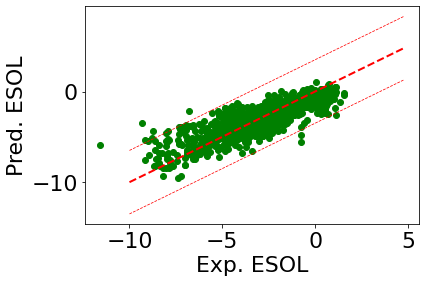

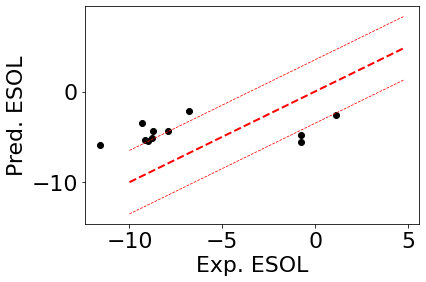

In [10]:
# plot two figures
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 3 srd (n=3) away from the ideal agreement. 

ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost['actual'], y=fps_xgboost['predict'], color='green')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 3 srd
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost_outliers['actual'], y=fps_xgboost_outliers['predict'], color='black')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.show()

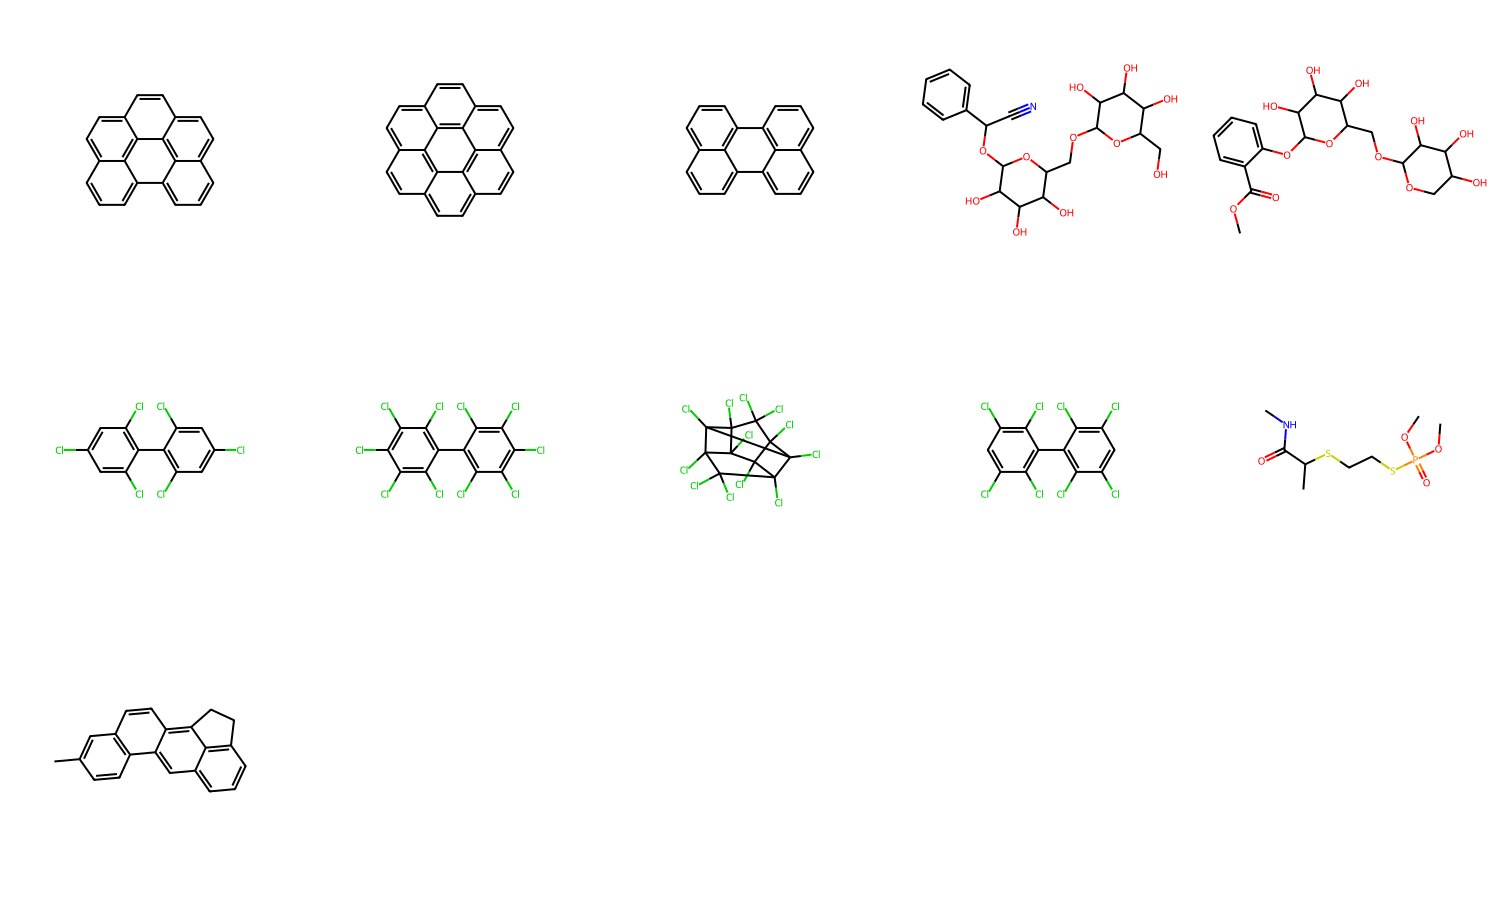

In [11]:
# draw n=3 outlier structure
outliners = [Chem.MolFromSmiles(x) for x in fps_xgboost_outliers['SMILES']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [12]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
fps_xgboost_outliers2 = fps_xgboost.loc[abs(fps_xgboost['std_residual']) > n]
fps_xgboost_outliers2

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
41,41,247,247,247,CC1CCCO1,247,0.110,-2.319324,-2.429324,-2.081429
50,50,296,296,296,CCCCC(C)CC,296,-5.160,-2.692281,2.467719,2.114325
53,53,306,306,306,Clc1ccc(cc1)c2ccc(Cl)cc2,306,-6.560,-3.658087,2.901913,2.486340
70,70,404,404,404,CCN(CC)C(=O)CSc1ccc(Cl)nn1,404,-1.716,-4.230009,-2.514009,-2.153986
74,74,427,427,427,c1cc2ccc3ccc4ccc5cccc6c(c1)c2c3c4c56,427,-9.018,-5.464283,3.553717,3.044801
...,...,...,...,...,...,...,...,...,...,...
117,117,725,725,725,CCC(C(CC)c1ccc(O)cc1)c2ccc(O)cc2,725,-4.430,-2.090583,2.339417,2.004398
126,126,775,775,775,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,775,-4.640,-2.153653,2.486347,2.130286
135,135,806,806,806,COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C,806,-5.190,-2.502734,2.687266,2.302432
154,154,957,957,957,CCOP(=S)(OCC)ON=C(C#N)c1ccccc1,957,-4.862,-2.401945,2.460055,2.107759


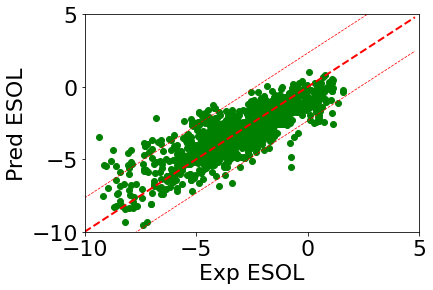

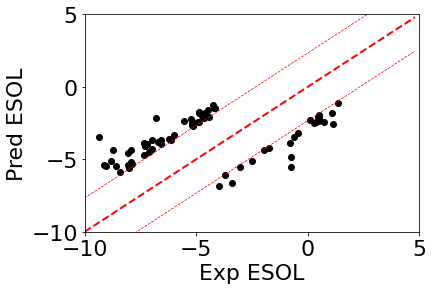

In [19]:
# plot two figures
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 2 srd (n=2) away from the ideal agreement. 
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost['actual'], y=fps_xgboost['predict'], color='green')
plt.xlabel('Exp ESOL')
plt.ylabel('Pred ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 2 srd
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost_outliers2['actual'], y=fps_xgboost_outliers2['predict'], color='black')
plt.xlabel('Exp ESOL')
plt.ylabel('Pred ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

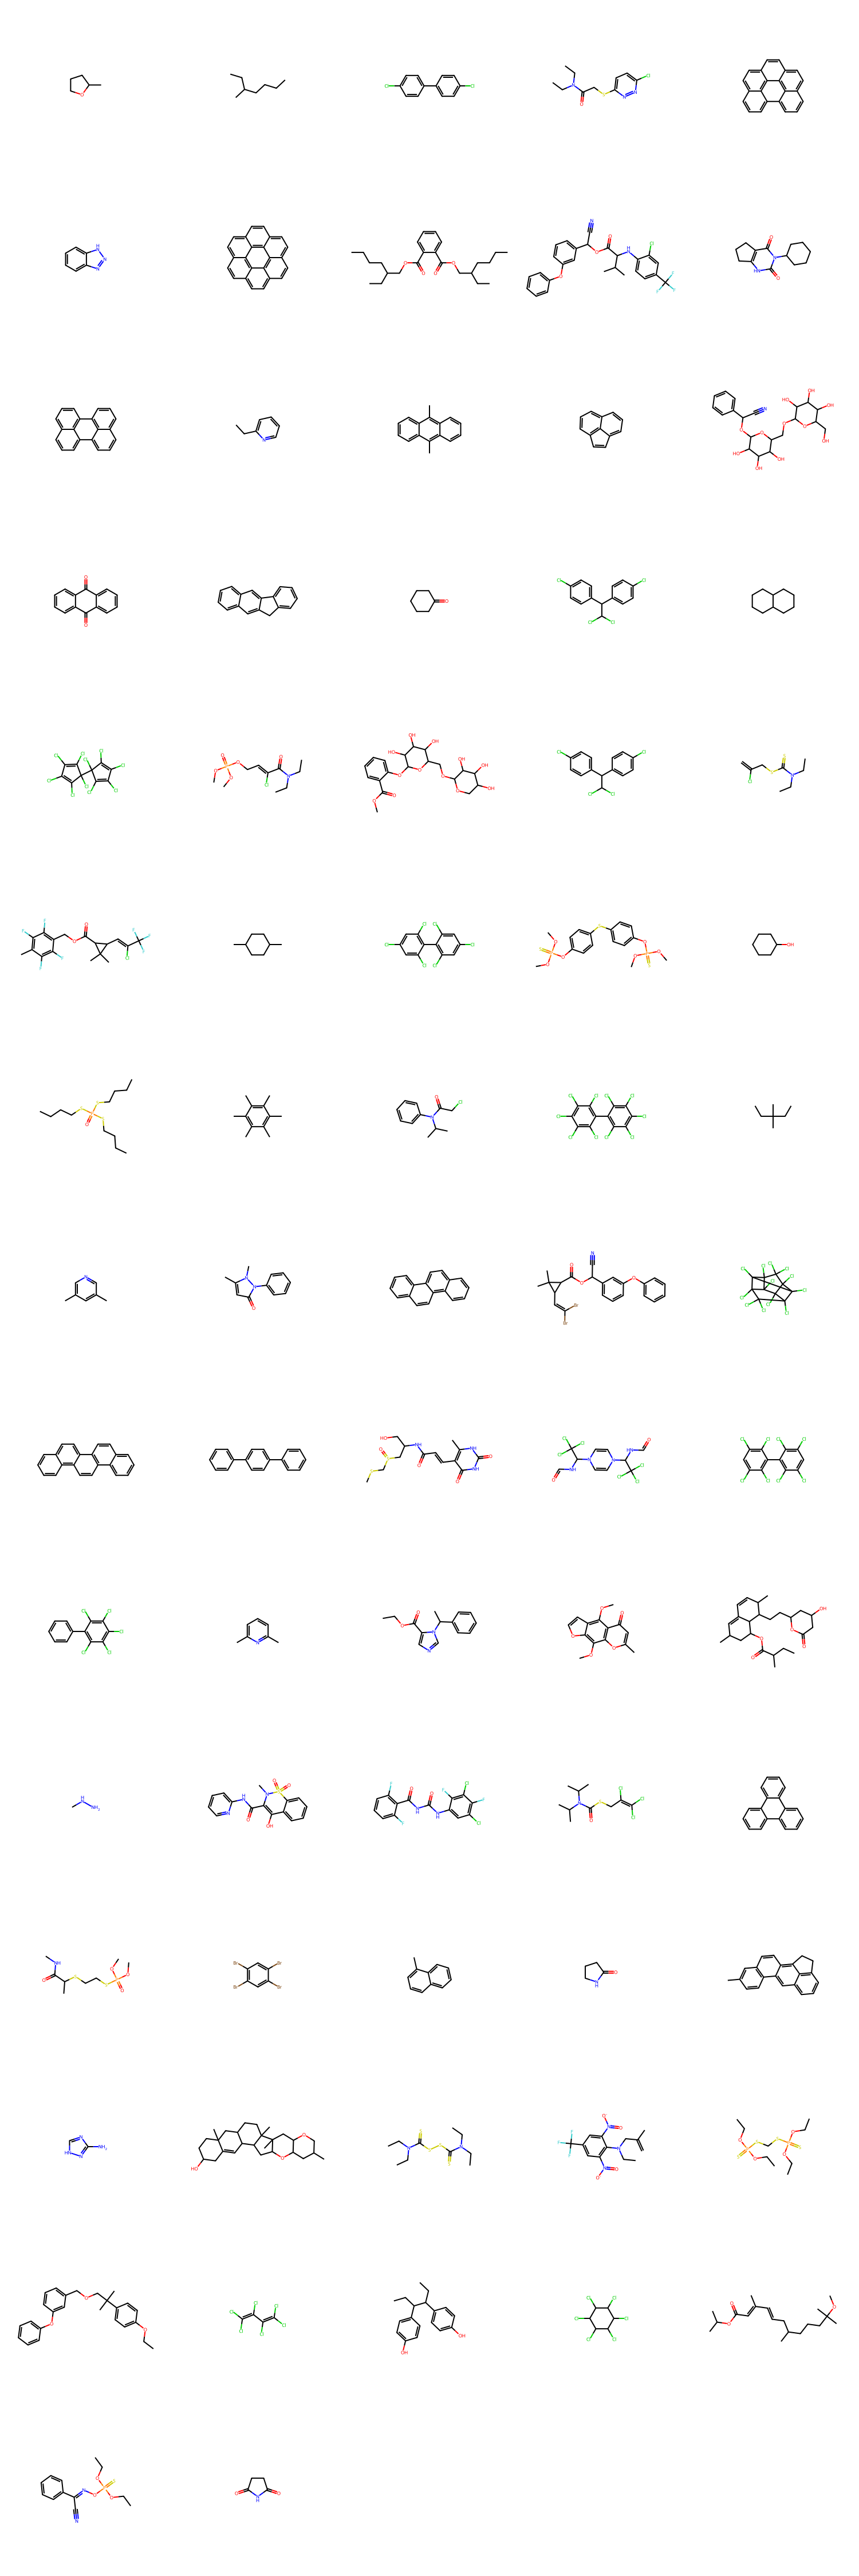

In [14]:
# draw n=2 outlier structure
outliners2 = [Chem.MolFromSmiles(x) for x in fps_xgboost_outliers2['SMILES']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [15]:
# save outliers (n=2) info to a csv file
fps_xgboost_outliers2.to_csv('fps_xgboost_esol_outliers2.csv')

In [16]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/esol.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in fps_xgboost_outliers2['SMILES']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

204.1519488730402
272.86426818172214


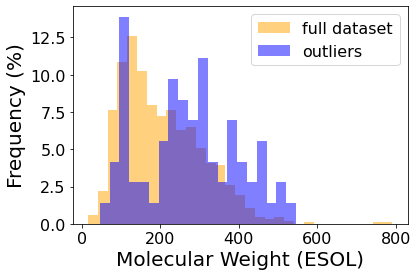

In [17]:
# plit molecular weight distribution for the full dataset and the outliers
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])

ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (ESOL)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()